In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


# K-Nearest Neighbor (최근접 이웃)

*   특별한 예측 모델 없이 새로 들어온 데이터가 기존의 데이터와 가장 가까운 데이터 포인트를 기반으로 예측을 수행

*   None parameter model or Instance model 이라고도 불림
*   Calssification 과 Regression 모두 지원



In [20]:
import numpy as np
import pandas as pd
import multiprocessing
import matplotlib.pyplot as plt
plt.style.use(['seaborn-whitegrid'])

In [4]:
from sklearn.manifold import TSNE
from sklearn.datasets import load_boston, fetch_california_housing
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline, Pipeline

# Classification

K-Nearest Neighbos Calssification

*   입력 데이터와 가장 가까운 K개의 훈련 데이터 포인트의 class를 확인하고 가장 많은 class를 예측 결과로 반환


In [73]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()

bc_X = cancer.data
bc_y = cancer.target

X_train, X_test, y_train, y_test = train_test_split(bc_X, bc_y, test_size = 0.2)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(455, 30)
(114, 30)
(455,)
(114,)


In [74]:
standard_scaler = StandardScaler()

X_train_scaled = standard_scaler.fit_transform(X_train)
X_test_scaled = standard_scaler.transform(X_test)

print(X_train.shape)
print(X_train_scaled.shape)

(455, 30)
(455, 30)


In [12]:
model = KNeighborsClassifier()
model.fit(X_train, y_train)

print("Cancer train score : {:.3f}".format(model.score(X_train, y_train)))
print("Cancer test score : {:.3f}".format(model.score(X_test, y_test)))
print()

model = KNeighborsClassifier()
model.fit(X_train_scaled, y_train)

print("Cancer train_scaled score : {:.3f}".format(model.score(X_train_scaled, y_train)))
print("Cancer test_scaled score : {:.3f}".format(model.score(X_test_scaled, y_test)))



Cancer train score : 0.941
Cancer test score : 0.965

Cancer train_scaled score : 0.971
Cancer test_scaled score : 0.974


In [13]:
# cross validation

cross_validate(
    estimator = KNeighborsClassifier(),
    X = bc_X, y = bc_y,
    cv = 10,
    n_jobs = multiprocessing.cpu_count(),
    verbose = True
)

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    1.6s finished


{'fit_time': array([0.00137925, 0.00843287, 0.00108242, 0.00085568, 0.00113678,
        0.00104928, 0.00105882, 0.00093913, 0.0009017 , 0.00115561]),
 'score_time': array([0.00516081, 0.00865197, 0.00399399, 0.00478625, 0.00481701,
        0.00519872, 0.01177287, 0.00473547, 0.00473428, 0.004462  ]),
 'test_score': array([0.9122807 , 0.87719298, 0.89473684, 0.96491228, 0.94736842,
        0.92982456, 0.96491228, 0.92982456, 0.9122807 , 0.96428571])}

In [15]:
# kNN 최적화 파라미터와 탐색

param_grid = [{
    'n_neighbors' : [3, 5, 7],
    'weights' : ['uniform', 'distance'],
    'algorithm' : ['ball_tree', 'kd_tree', 'brute']
}]

gs = GridSearchCV(
    estimator = KNeighborsClassifier(),
    param_grid = param_grid,
    n_jobs = multiprocessing.cpu_count(),
    verbose = True
)

gs.fit(bc_X, bc_y)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


GridSearchCV(estimator=KNeighborsClassifier(), n_jobs=2,
             param_grid=[{'algorithm': ['ball_tree', 'kd_tree', 'brute'],
                          'n_neighbors': [3, 5, 7],
                          'weights': ['uniform', 'distance']}],
             verbose=True)

In [17]:
print(gs.best_estimator_)
print()
print(gs.best_params_)
print()
print(gs.best_score_)

KNeighborsClassifier(algorithm='ball_tree', weights='distance')

{'algorithm': 'ball_tree', 'n_neighbors': 5, 'weights': 'distance'}

0.9297003570874087


In [38]:
# pipeline sample

pipe = Pipeline([
                 ('scaler', StandardScaler()),
                 ('model', KNeighborsClassifier())
])

param_grid = [{
    'model__n_neighbors' : [3, 5, 7],
    'model__weights' : ['uniform', 'distance'],
    'model__algorithm' : ['ball_tree', 'kd_tree', 'brute']
}]

gs = GridSearchCV(
    estimator = pipe,
    param_grid = param_grid,
    n_jobs = multiprocessing.cpu_count(),
    verbose = True
)

gs.fit(bc_X, bc_y)


Fitting 5 folds for each of 18 candidates, totalling 90 fits


GridSearchCV(estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('model', KNeighborsClassifier())]),
             n_jobs=2,
             param_grid=[{'model__algorithm': ['ball_tree', 'kd_tree', 'brute'],
                          'model__n_neighbors': [3, 5, 7],
                          'model__weights': ['uniform', 'distance']}],
             verbose=True)

In [39]:
print(gs.best_estimator_)
print()
print(gs.best_score_)
print()
print(gs.best_params_)

Pipeline(steps=[('scaler', StandardScaler()),
                ('model',
                 KNeighborsClassifier(algorithm='ball_tree', n_neighbors=7))])

0.9701288619779538

{'model__algorithm': 'ball_tree', 'model__n_neighbors': 7, 'model__weights': 'uniform'}


In [33]:
# visualize

def make_meshgrid(x, y, h = 0.02):
  x_min = x.min() - 0.5
  x_max = x.max() + 0.5
  y_min = y.min() - 0.5
  y_max = y.max() + 0.5

  xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                       np.arange(y_min, y_max, h))
  
  return xx, yy

def plot_contours(clf, xx, yy, **params):
  Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
  Z = Z.reshape(xx.shape)
  out = plt.contourf(xx, yy, Z, **params)

  return out

tsne = TSNE(n_components = 2)
X_comp = tsne.fit_transform(bc_X)


/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


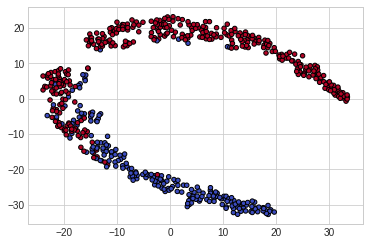

In [34]:
plt.scatter(X_comp[:, 0], X_comp[:, 1],
            c = bc_y, cmap = plt.cm.coolwarm, s = 20, edgecolors = 'k')

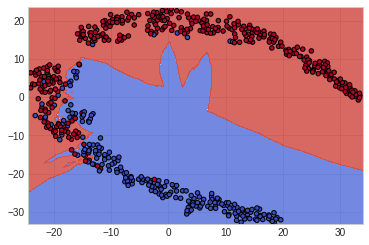

In [40]:
model = KNeighborsClassifier()
model.fit(X_comp, bc_y)
predict = model.predict(X_comp)

xx, yy = make_meshgrid(X_comp[:, 0], X_comp[:, 1])
plot_contours(model, xx, yy, cmap = plt.cm.coolwarm, alpha = 0.8)
plt.scatter(X_comp[:, 0], X_comp[:, 1], c = bc_y, cmap = plt.cm.coolwarm, s = 20, edgecolors = 'k')

# Regression

K-Nearest Neighbor Regression

*   K개의 이웃 데이터를 탐색하고 이웃 데이터 포인트의 평균을 예측 결과로 반환

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.datasets import load_boston, fetch_california_housing

boston = load_boston()

bos_X = boston.data
bos_y = boston.target

X_train, X_test, y_train, y_test = train_test_split(bos_X, bos_y, test_size = 0.2)

# california = fetch_california_housing()

# cali_X = california.data
# cali_y = california.target

# X_train, X_test, y_train, y_test = train_test_split(cali_X, cali_y, test_size = 0.2)


In [92]:
standard_scaler = StandardScaler()
X_train_scaled = standard_scaler.fit_transform(X_train)
X_test_scaled = standard_scaler.transform(X_test)

print(X_train.shape)
print(X_train_scaled.shape)


(404, 13)
(404, 13)


In [93]:
model = KNeighborsRegressor()
model.fit(X_train, y_train)

print("Boston train score : {:.3f}".format(model.score(X_train, y_train)))
print("Boston test score : {:.3f}".format(model.score(X_test, y_test)))
print()

model = KNeighborsRegressor()
model.fit(X_train_scaled, y_train)

print("Boston train scaled score : {:.3f}".format(model.score(X_train_scaled, y_train)))
print("Boston test scaled score : {:.3f}".format(model.score(X_test_scaled, y_test)))

Boston train score : 0.713
Boston test score : 0.537

Boston train scaled score : 0.830
Boston test scaled score : 0.781


In [94]:
# cross validation

estimator = make_pipeline(
    StandardScaler(),
    KNeighborsRegressor()
)

cross_validate(
    estimator = estimator,
    X = bos_X, y = bos_y,
    cv = 5,
    n_jobs = multiprocessing.cpu_count(),
    verbose = True
)


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   5 out of   5 | elapsed:    0.0s finished


{'fit_time': array([0.00247669, 0.00255752, 0.00266075, 0.00172091, 0.00169611]),
 'score_time': array([0.00441837, 0.00189567, 0.00260925, 0.00173426, 0.0015502 ]),
 'test_score': array([0.56089547, 0.61917359, 0.48661916, 0.46986886, 0.23133037])}

In [95]:
# 파라미터 최적화


param_grid = [{
    'n_neighbors' : [3, 5, 7],
    'weights' : ['uniform', 'distance'],
    'algorithm' : ['ball_tree', 'kd_tree', 'brute']
}]

gs = GridSearchCV(
    estimator = KNeighborsRegressor(),
    param_grid = param_grid,
    n_jobs = multiprocessing.cpu_count(),
    verbose = True
)

gs.fit(bos_X, bos_y)


print(gs.best_estimator_)
print()
print(gs.best_score_)
print()
print(gs.best_params_)

Fitting 5 folds for each of 18 candidates, totalling 90 fits
KNeighborsRegressor(algorithm='ball_tree', n_neighbors=7)

-0.30533542609085224

{'algorithm': 'ball_tree', 'n_neighbors': 7, 'weights': 'uniform'}
